# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.289873e+01     1.498874e+01
 * time: 0.0022690296173095703
     1     6.232587e+01     9.140399e+00
 * time: 0.006181001663208008
     2     5.607577e+01     1.150891e+01
 * time: 0.01489114761352539
     3     4.010910e+01     9.240616e+00
 * time: 0.026827096939086914
     4     3.043022e+01     9.169870e+00
 * time: 0.038995981216430664
     5     2.719996e+01     7.592430e+00
 * time: 0.04943394660949707
     6     1.240493e+01     3.183934e+00
 * time: 0.10200905799865723
     7     8.686295e+00     1.709536e+00
 * time: 0.11161994934082031
     8     8.067456e+00     2.045250e+00
 * time: 0.12072300910949707
     9     7.659541e+00     1.404392e+00
 * time: 0.12960410118103027
    10     7.121333e+00     2.408078e+00
 * time: 0.1369161605834961
    11     6.583768e+00     1.577827e+00
 * time: 0.14576005935668945
    12     6.140086e+00     1.269911e+00
 * time: 0.15452814102172852
    13     5.957700e+00     1.675909e+00
 * t

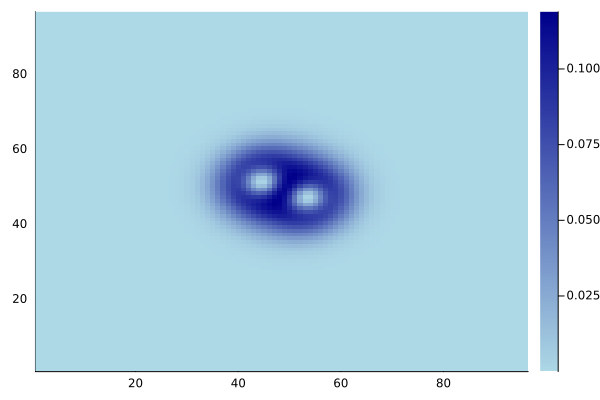

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)